In [2]:
import pandas as pd

In [35]:
routes_df = pd.read_csv('covid_abm/data/routes_data.tsv', sep='\t')

In [36]:
routes_df.head()

,id_from,id_to,line_from,station_from,line_to,station_to,route_type,delay
0,0,1,Сокольническая,Бульвар Рокоссовского,Сокольническая,Черкизовская,drive,120
1,1,0,Сокольническая,Черкизовская,Сокольническая,Бульвар Рокоссовского,drive,120
2,1,2,Сокольническая,Черкизовская,Сокольническая,Преображенская площадь,drive,240
3,2,1,Сокольническая,Преображенская площадь,Сокольническая,Черкизовская,drive,240
4,2,3,Сокольническая,Преображенская площадь,Сокольническая,Сокольники,drive,180


In [37]:
import matplotlib.pyplot as plt
import networkx as nx

In [43]:
G = nx.nx.from_pandas_edgelist(routes_df, 'id_from', 'id_to', ['delay', 'station_from', 'station_to'])

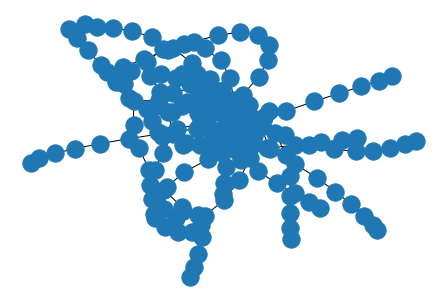

In [48]:
nx.draw(G)

In [20]:
%matplotlib inline

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

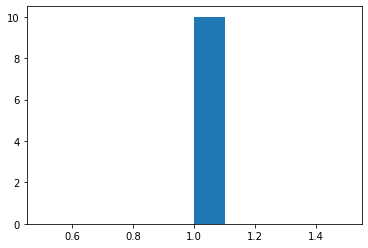

In [25]:
import matplotlib.pyplot as plt

from covid_abm.covid_abm.model import CovidABMModel


model = CovidABMModel(10, 10, 10)
for i in range(10):
    model.step()
    
agent_health = [int(a.is_infected) for a in model.schedule.agents]
plt.hist(agent_health)

(array([  0., 100., 100., 100., 100., 100., 100., 100., 100., 200.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

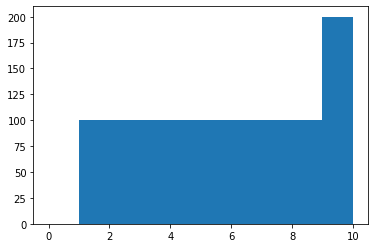

In [31]:
all_health = []
for j in range(100):
    # Run the model
    model = CovidABMModel(10, 10, 10)
    for i in range(10):
        model.step()

    # Store the results
    count_sick = 0
    for agent in model.schedule.agents:
        if agent.is_infected:
            count_sick += 1
        all_health.append(count_sick)

plt.hist(all_health, bins=range(max(all_health)+1))

In [39]:
stations_df = pd.read_csv('covid_abm/data/stations_data.tsv', sep='\t')

In [40]:
stations_df.head()

,id,line_name,station_name,station_type,delay_morning,delay_rush,delay_night,lat,lon
0,0,Сокольническая,Бульвар Рокоссовского,deadend,120,90,360,55.814269,37.735117
1,1,Сокольническая,Черкизовская,pass,120,90,360,55.802991,37.744825
2,2,Сокольническая,Преображенская площадь,pass,120,90,360,55.796172,37.715022
3,3,Сокольническая,Сокольники,pass,120,90,360,55.789200,37.679706
4,4,Сокольническая,Красносельская,pass,120,90,360,55.779853,37.666077
